<font size = 6, color = "cyan"><b> Independent Project I </b></font>

<font size = 5, color = "pink"><b> HR Analytics: Employee Attrition </b></font>

<em><u>This project comprises two parts:</em></u>

_1. Dashboard Visualization using Microsoft Power BI_

_2. Statistical Insights & Predictions Using Machine Learning_

<font size = 4, color = "gold"><b> About the Dataset </b></font>
* The dataset titled [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data) was obtained through Kaggle
* It's a fictional dataset containing <u>1470 records and 35 attributes</u> (e.g., job satisfaction, job role, education, performance rating, years with current manager, etc.) with the <u>class being Attrition</u> (Yes/No Binary Variable)

<font size = 4, color = "gold"><b> Data Cleaning </b></font>
* All data cleaning was done using Microsoft Excel

<u>Steps:</u>

1. Spell Checking --> no spelling errors
2. Checking for Blanks --> no blanks
3. Checking for Duplicate Rows --> no duplicate rows
4. Checking for Unnecessary Whitespaces --> removed any white spaces and replaced them with underscores (_)

<font size = 4, color = "gold"><b> Data Preprocessing </b></font>

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [465]:
dataset_file_path = r'C:\Users\user\OneDrive\Desktop\Post-Grad Stuff\Analytics Practice\Datasets (Original Format)\hr_employee_attrition_dataset.csv'

# normally, I would just pass the filepath so we can read the dataset into the dataframe
# however, I ran df.info() later and identified 9 categorical variables, so I decided to pass a dtype parameter, assigning them to the dtype 'category' 
# which is a memory-efficient way to store and handle categorical data by assigning each value a unique integer ID to each category
# (note that I checked that all 9 are nominal data)

# you would still need to encode these attributes if you're using models like Linear Regression, Logistic Regression, SVM, KNN, or Neural Networks
# (require numerical input and do not handle 'category' automatically)
# however, if using tree-based models like XGBoost or Random Forest, no need to encode later (they handle category dtype automatically).

dtype_options = {
    'Attrition': 'category', 
    'BusinessTravel': 'category',
    'Department':'category',
    'EducationField':'category',
    'Gender':'category',
    'JobRole':'category',
    'MaritalStatus': 'category',
    'Over18':'category',
    'OverTime':'category'
}

df = pd.read_csv(filepath_or_buffer = dataset_file_path, dtype = dtype_options)

In [ ]:
display(df)                     # displays dataset
df.info()                       # provides insights on non-null count, dtype of each column
df.nunique()                    # shows number of unique values for each column
df.describe().drop('count')     # data summary (count, mean, standard deviation, min, max, and percentiles for each numerical column)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research_&_Development,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_&_Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_&_Development,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research_&_Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research_&_Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research_&_Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research_&_Development,4,3,Life_Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [467]:
df.nunique()                        # by running this, we identify three columns with only 1 unique value, which means for all records
                                    # this attribute is the same --> will not benefit us in the study so remove
                                    # these columns are EmployeeCount, Over18, StandardHours
                                    # we can also remove EmployeeNumber, as it's a unique identifier for each employee and does not contribute to the model
                                    # other unnecessary attributes we can remove are Education (#s don't really show us anything), DailyRate, HourlyRate

updated_df = df.drop(columns = ['DailyRate', 'Education', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours'])      # 27 features
updated_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,Life_Sciences,2,Female,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research_&_Development,8,Life_Sciences,3,Male,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research_&_Development,2,Other,4,Male,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research_&_Development,3,Life_Sciences,4,Female,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research_&_Development,2,Medical,1,Male,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research_&_Development,23,Medical,3,Male,4,2,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research_&_Development,6,Medical,4,Male,2,3,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research_&_Development,4,Life_Sciences,2,Male,4,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,Medical,4,Male,2,2,...,3,4,0,17,3,2,9,6,0,8


In [468]:
updated_df.select_dtypes(include = ['category']).nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

<font color = "gray"><b>Chi-Square Test Analysis</b></font>

<font color = "gray">
<li>Used to compare observed results with expected results</li>
<li>We want to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables we're studying</li>


<em>Through the Chi-Square Test Analysis, we can determine if there's a signficant relationship between two categorical variables through the p-value. If the p-value is less than 0.05, it means that there the categorical variable is a signficant predictor of the dependent categorical variable and that there is less than 1/1000 chance that these results are just by pure chance/coincidence</em></font>


In [469]:
from scipy.stats import chi2_contingency

def chi_square_test(df, target_var, categorical_vars):
    results = []
    for variable in categorical_vars:
        contingency_table = pd.crosstab(df[variable], df[target_var]) # create contingency table (checking the relationship between each variable and the target 'Attrition')
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        results.append({
            'Variable': variable,
            'Chi-Square Stat': round(chi2_stat, 4),
            'P-value': round(p_value, 4),
            'Degrees of Freedom': dof
        })
    return pd.DataFrame(results)

In [470]:
X = updated_df.drop(columns = ['Attrition'])
categorical_varnames = X.columns
chi_results = chi_square_test(df, 'Attrition', categorical_varnames)

chi_results

,Variable,Chi-Square Stat,P-value,Degrees of Freedom
0,Age,119.1749,0.0000,42
1,BusinessTravel,24.1824,0.0000,2
2,Department,10.7960,0.0045,2
3,DistanceFromHome,38.1685,0.0953,28
4,EducationField,16.0247,0.0068,5
5,EnvironmentSatisfaction,22.5039,0.0001,3
6,Gender,1.1170,0.2906,1
7,JobInvolvement,28.4920,0.0000,3
8,JobLevel,72.5290,0.0000,4
9,JobRole,86.1903,0.0000,8


In [471]:
significant_vars = chi_results[chi_results['P-value'] < 0.05]['Variable']
significant_vars                # identify only the features that share a significant relationship with 'Attrition' (could be a predictor of attrition) --> 19

0                         Age
1              BusinessTravel
2                  Department
4              EducationField
5     EnvironmentSatisfaction
7              JobInvolvement
8                    JobLevel
9                     JobRole
10            JobSatisfaction
11              MaritalStatus
14         NumCompaniesWorked
15                   OverTime
19           StockOptionLevel
20          TotalWorkingYears
21      TrainingTimesLastYear
22            WorkLifeBalance
23             YearsAtCompany
24         YearsInCurrentRole
26       YearsWithCurrManager
Name: Variable, dtype: object

<em>Shocking how monthly income and performance rating are not significant predictors... I think I am going to keep these two because it doesn't make sense to remove them</em>

In [476]:
# let's save a copy of the new dataset containing only the significant features (+ monthly income and performance rating)
sig_dataset = updated_df.drop(columns = ['DistanceFromHome', 'Gender', 'MonthlyRate', 'PercentSalaryHike', 'RelationshipSatisfaction', 'YearsSinceLastPromotion'])
sig_dataset

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,NumCompaniesWorked,OverTime,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,Life_Sciences,2,3,2,Sales_Executive,4,...,8,Yes,3,0,8,0,1,6,4,5
1,49,No,Travel_Frequently,Research_&_Development,Life_Sciences,3,2,2,Research_Scientist,2,...,1,No,4,1,10,3,3,10,7,7
2,37,Yes,Travel_Rarely,Research_&_Development,Other,4,2,1,Laboratory_Technician,3,...,6,Yes,3,0,7,3,3,0,0,0
3,33,No,Travel_Frequently,Research_&_Development,Life_Sciences,4,3,1,Research_Scientist,3,...,1,Yes,3,0,8,3,3,8,7,0
4,27,No,Travel_Rarely,Research_&_Development,Medical,1,3,1,Laboratory_Technician,2,...,9,No,3,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research_&_Development,Medical,3,4,2,Laboratory_Technician,4,...,4,No,3,1,17,3,3,5,2,3
1466,39,No,Travel_Rarely,Research_&_Development,Medical,4,2,3,Healthcare_Representative,1,...,4,No,3,1,9,5,3,7,7,7
1467,27,No,Travel_Rarely,Research_&_Development,Life_Sciences,2,4,2,Manufacturing_Director,2,...,1,Yes,4,1,6,0,3,6,2,3
1468,49,No,Travel_Frequently,Sales,Medical,4,2,2,Sales_Executive,2,...,2,No,3,0,17,3,2,9,6,8


<font color = "gray"><b>Encoding of Categorical Features</b></font>

In [ ]:
# note the following binary attributes (Gender, OverTime) in addition to, of course, our class 'attrition'
# it wouldn't make sense to one-hot encode attrition as we're trying to predict it
# we can use label/ordinal encoding instead (as well as for our binary variables)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Label Encoding for Attrition & Overtime
label_encoder = LabelEncoder()
sig_dataset['Attrition'] = label_encoder.fit_transform(sig_dataset['Attrition'])                        # Yes = 1, No = 0
sig_dataset['OverTime'] = label_encoder.fit_transform(sig_dataset['OverTime'])                          # Yes = 1, No = 0

# Ordinal Encoding for 'Business Travel'
ordinal_encoder = OrdinalEncoder()
travel_order = ['Non_Travel', 'Travel_Rarely', 'Travel_Frequently']     # enforce the order, otherwise will follow the alphabetical order to assign vals
ordinal_encoder = OrdinalEncoder(categories = [travel_order], handle_unknown = 'use_encoded_value', unknown_value = -1)
sig_dataset['BusinessTravel'] = ordinal_encoder.fit_transform(sig_dataset[['BusinessTravel']])

sig_dataset

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,NumCompaniesWorked,OverTime,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1.0,Sales,Life_Sciences,2,3,2,Sales_Executive,4,...,8,1,3,0,8,0,1,6,4,5
1,49,0,2.0,Research_&_Development,Life_Sciences,3,2,2,Research_Scientist,2,...,1,0,4,1,10,3,3,10,7,7
2,37,1,1.0,Research_&_Development,Other,4,2,1,Laboratory_Technician,3,...,6,1,3,0,7,3,3,0,0,0
3,33,0,2.0,Research_&_Development,Life_Sciences,4,3,1,Research_Scientist,3,...,1,1,3,0,8,3,3,8,7,0
4,27,0,1.0,Research_&_Development,Medical,1,3,1,Laboratory_Technician,2,...,9,0,3,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2.0,Research_&_Development,Medical,3,4,2,Laboratory_Technician,4,...,4,0,3,1,17,3,3,5,2,3
1466,39,0,1.0,Research_&_Development,Medical,4,2,3,Healthcare_Representative,1,...,4,0,3,1,9,5,3,7,7,7
1467,27,0,1.0,Research_&_Development,Life_Sciences,2,4,2,Manufacturing_Director,2,...,1,1,4,1,6,0,3,6,2,3
1468,49,0,2.0,Sales,Medical,4,2,2,Sales_Executive,2,...,2,0,3,0,17,3,2,9,6,8


In [ ]:
# apply One Hot Encoding (dummy vars) for the remaining nominal attributes
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False) # returns a sparse matrix by default, which can cause issues when passing it to pd.DataFrame()
                                               # hence, convert to a dense array

nominal_cols = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
one_hot_encoded = encoder.fit_transform(sig_dataset[nominal_cols])

# now convert to dataframe and join with the original dataframe (while also removing the original cols since now you have the encoded ones)
one_hot_encoded_df = pd.DataFrame(data = one_hot_encoded, columns = encoder.get_feature_names_out(nominal_cols))
encoded_df = pd.concat(objs = [sig_dataset.drop(nominal_cols, axis = 1), one_hot_encoded_df], axis = 1)

display(encoded_df)         # we now have 38 features

,Age,Attrition,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1.0,2,3,2,4,5993,8,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,2.0,3,2,2,2,5130,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1.0,4,2,1,3,2090,6,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,2.0,4,3,1,3,2909,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,1.0,1,3,1,2,3468,9,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2.0,3,4,2,4,2571,4,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,1.0,4,2,3,1,9991,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,1.0,2,4,2,2,6142,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,2.0,4,2,2,2,5390,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<font size = 4, color = "gold"><b> II. Statistical Insights & Predictions Using Machine Learning </b></font>

<font size = 4, color = "green"><b> Statistical Insights </b></font>

In [481]:
# define the target (y) and X (attributes)
y = encoded_df['Attrition']
X = encoded_df.drop(columns = ['Attrition'])

In [482]:
# class distribution --> we can see it's unbalanced (More No than Yes, which makes sense)
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

<font color = "gray"><b>Multicollinearity & Variance Inflation Error (VIF)</b></font>

<font size = 4, color = "green"><em>It's important we watch out for multicollinearity (as well as weakly-correlated attributes); <u>Why?</u></em></font>

    Some predictors give redundant information

    The model coefficients may be unreliable

    This makes it difficult to determine the unique influence of each predictor on the dependent variable

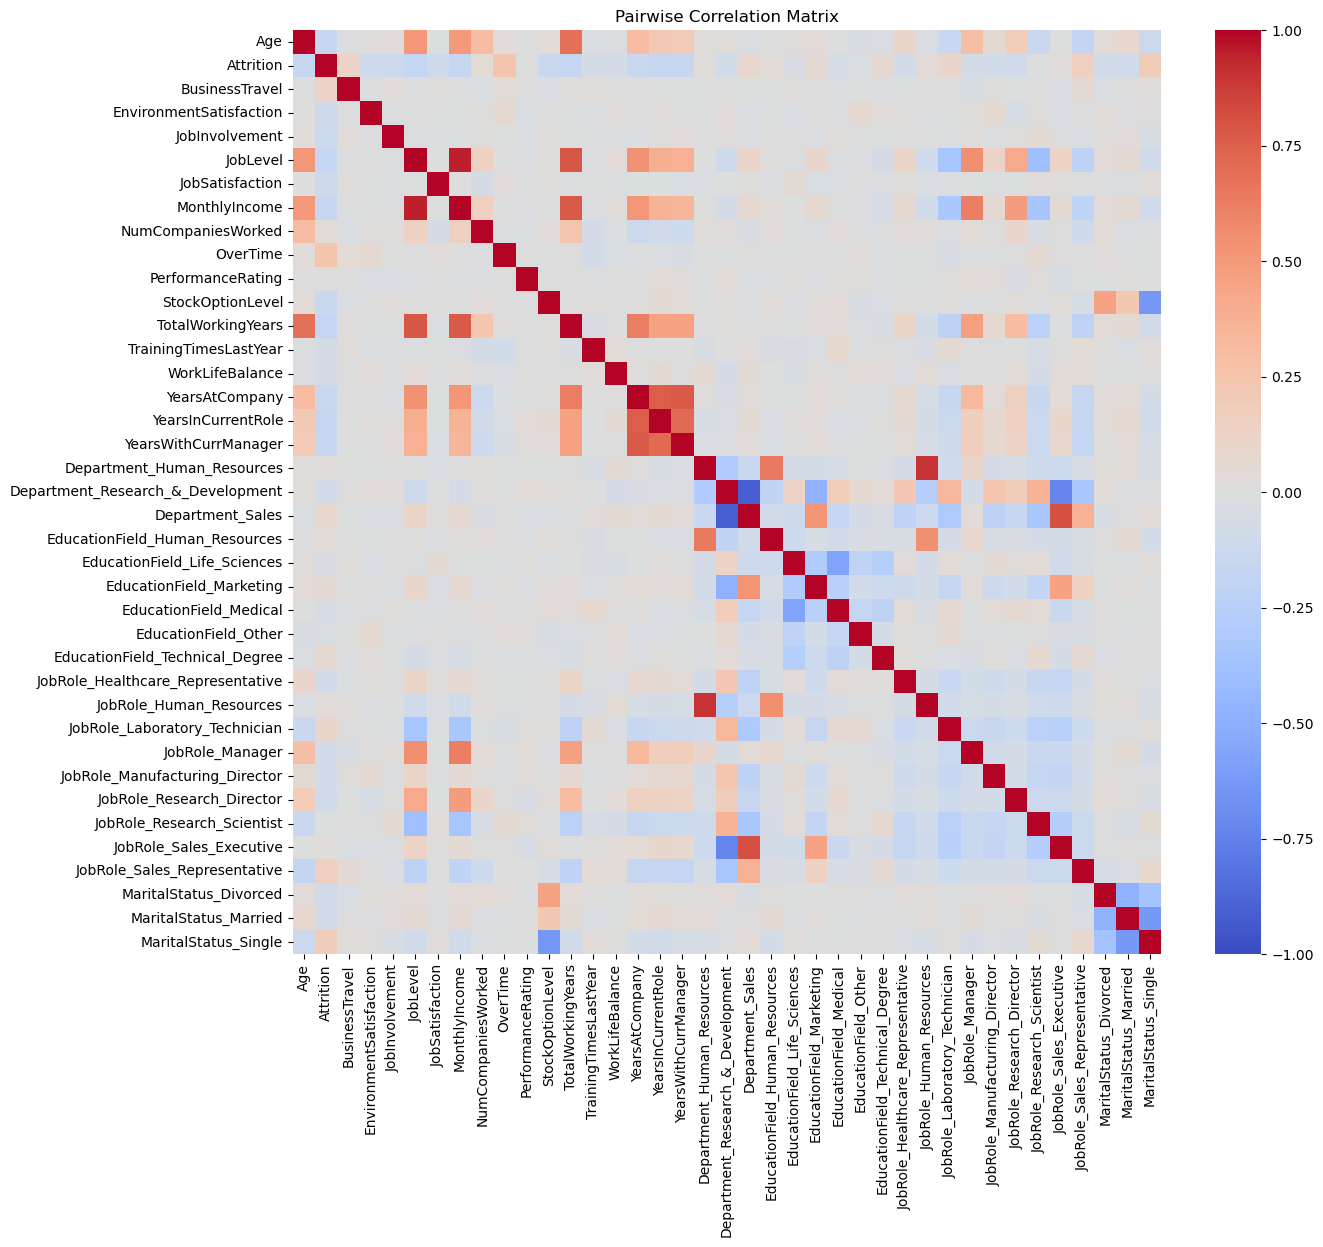

In [483]:
# Compute the pairwise correlation matrix
correlation_matrix = encoded_df.corr(numeric_only = True)

# Visualize it
plt.figure(figsize = (14, 12))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Pairwise Correlation Matrix')
plt.show()

In [484]:
# check which variables are highly correlated and which are weakly correlated with the target

# checking for multicollinearity (corr ~ +1 or -1 -- we can make the threshold |0.8|)
high_correlated_set = set()
corr_threshold = 0.8        # I've seen it in another paper that they used a threshold of 0.8 to identify highly correlated features

abs_correlation_mat = correlation_matrix.abs()
for row in range(len(abs_correlation_mat.columns)):
    for col in range(row):
        if abs_correlation_mat.iloc[row, col] > corr_threshold:
            high_correlated_set.add(abs_correlation_mat.columns[row])

high_correlated_set

{'Department_Sales',
 'JobRole_Human_Resources',
 'JobRole_Sales_Executive',
 'MonthlyIncome'}

In [485]:
# now checking for weakly-correlated features with the target 
attrition_corr = correlation_matrix['Attrition'].abs()
weakly_correlated_features = attrition_corr[attrition_corr < 0.01].index.tolist()

weakly_correlated_features

['PerformanceRating', 'JobRole_Research_Scientist']

<em>It looks like checking for correlation has confirmed the insignificant p-value achieved by both Monthly Income & Performance Rating. Looks like we're going to remove them. However, I personally would want to see if the department or job role one is in impacts attrition</em>

In [ ]:
new_df = encoded_df.drop(columns = ['MonthlyIncome', 'PerformanceRating'])
new_df          # 36 features

,Age,Attrition,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,StockOptionLevel,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1.0,2,3,2,4,8,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,2.0,3,2,2,2,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1.0,4,2,1,3,6,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,2.0,4,3,1,3,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,1.0,1,3,1,2,9,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2.0,3,4,2,4,4,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,1.0,4,2,3,1,4,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,1.0,2,4,2,2,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,2.0,4,2,2,2,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [487]:
# computing VIF for each predictor to verify that we got rid of the multicollinear predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
temp_X = new_df.drop(columns = ['Attrition'])
vif_data['Feature'] = temp_X.columns
vif_data['VIF'] = [variance_inflation_factor(temp_X.values, i) for i in range(len(temp_X.columns))]
vif_data                # VIF < 5 --> low multicollinearity
                        # VIF ~ 1 --> no multicollinearity
                        # VIF > 10 --> severe multcollinearity, requires corrective measures
                        # VIF = inf --> perfect collinearity (one variable is a perfect linear combination of others, as in one category can be predicted from the other two)

c:\Users\user\anaconda3\envs\deep_learning1\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Age,2.033184
1,BusinessTravel,1.017838
2,EnvironmentSatisfaction,1.022545
3,JobInvolvement,1.019486
4,JobLevel,6.495483
5,JobSatisfaction,1.014947
6,NumCompaniesWorked,1.266902
7,OverTime,1.027143
8,StockOptionLevel,1.898765
9,TotalWorkingYears,4.874819


* As we can see all predictors (which were not one-hot encoded) have a VIF < 5 --> low multicollinearity 
* JobLevel has a VIF > 5, but its p-value was 0.000 (very significant so keep :))
* All one-hot encoded predictors have a VIF of inf :)

In [488]:
newer_X = new_df.drop(columns = ['Attrition'])
newer_y = new_df['Attrition']

<font size = 4, color = "green"><b> Experimenting with Machine Learning Models </b></font>

In [489]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import SelectFromModel           # LASSO 
from sklearn.feature_selection import RFE                       # RFE

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

<font color = "gray"><b>Feature Selection using Z-Score Normalization</b></font>

In [490]:
zscore_norm = StandardScaler()
X_rescaled = zscore_norm.fit_transform(newer_X)
X_rescaled_df = pd.DataFrame(X_rescaled, columns = newer_X.columns)      # SMOTE expects it as a dataframe
X_rescaled_df

,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,-0.162399,-0.660531,0.379672,-0.057788,1.153254,2.125136,1.591746,-0.932014,-0.421642,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650
1,1.322365,1.717339,0.254625,-1.026167,-0.057788,-0.660853,-0.678049,-0.628241,0.241988,-0.164511,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
2,0.008343,-0.162399,1.169781,-1.026167,-0.961486,0.246200,1.324226,1.591746,-0.932014,-0.550208,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
3,-0.429664,1.717339,1.169781,0.379672,-0.961486,0.246200,-0.678049,1.591746,-0.932014,-0.421642,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,-1.086676,-0.162399,-1.575686,0.379672,-0.961486,-0.660853,2.525591,-0.628241,0.241988,-0.678774,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.717339,0.254625,1.785511,-0.057788,1.153254,0.523316,-0.628241,0.241988,0.735447,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1466,0.227347,-0.162399,1.169781,-1.026167,0.845911,-1.567907,0.523316,-0.628241,0.241988,-0.293077,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1467,-1.086676,-0.162399,-0.660531,1.785511,-0.057788,-0.660853,-0.678049,1.591746,0.241988,-0.678774,...,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1468,1.322365,1.717339,1.169781,-1.026167,-0.057788,-0.660853,-0.277594,-0.628241,-0.932014,0.735447,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565


<font size = 4, color = "gray"><b> 1) Logistic Regression </b></font>

<font size = 4, color = "gray"> <em>
<li>Used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1 (note that if there's more than 2 categories, softmax function is used)</li>
<li>If we have two classes (Class 0 and Class 1) --> if the value of the logistic function for an input is greater than some threshold value (e.g. 0.5) then it belongs to Class 1 otherwise it belongs to Class 0 </li>
<li>Extension of linear regression but mainly used for classification tasks (dependent variable must be categorical or discrete) </li>
<li>Instead of fitting a regression line, we fit an “S” shaped logistic function, which predicts two maximum values (0 or 1)</li>
</em></font>

<font color = "gray">
<b>Assumptions: </b>
<li><u>Independent Observations:</u> Each observation is independent of the other. meaning there is no correlation between any input variables.</li>
<li><u>Binary dependent variables:</u> It takes the assumption that the dependent variable must be binary or dichotomous, meaning it can take only two values. For more than two categories SoftMax functions are used</li>
<li><u>Linearity relationship between independent variables and log odds:</u> The relationship between the independent variables and the log odds of the dependent variable should be linear</li>
<li><u>No outliers:</u> There should be no outliers in the dataset</li>
<li><u>Large sample size:</u> The sample size is sufficiently large</li>
</font>

<font color = "gray"><u><em>No Feature Selection or Class Imbalance Handling</em></u>

Overall Logistic Regression Model Performance:

- Accuracy: 74.15 %
- Precision: 36.00 %
- Recall: 75.00 %
- F1-score: 48.65 %

- Confusion Matrix: 
[[182  64]
 [ 12  36]]


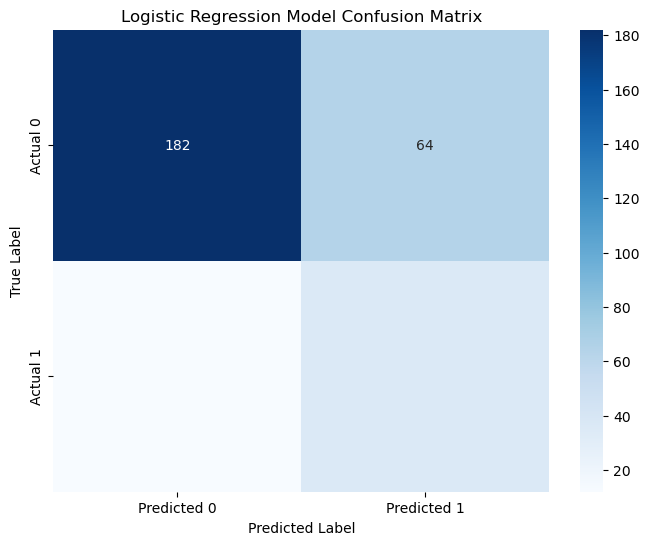

In [491]:
# split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_rescaled_df, newer_y, test_size = 0.20, random_state = 23)

logRegModel = LogisticRegression(class_weight = 'balanced', random_state = 23)   # class_weight useful for imbalanced classes (like in our case)
logRegModel.fit(X_train, y_train)
prediction = logRegModel.predict(X_test)

logReg_accuracy = accuracy_score(y_test, prediction)
logReg_f1score = f1_score(y_test, prediction)
logReg_precision = precision_score(y_test, prediction)
logReg_recall = recall_score(y_test, prediction)

logReg_confMatrix = confusion_matrix(y_test, prediction)

print("Overall Logistic Regression Model Performance:\n")
print(f'- Accuracy: {logReg_accuracy * 100:.2f} %')
print(f'- Precision: {logReg_precision * 100:.2f} %')
print(f'- Recall: {logReg_recall * 100:.2f} %')
print(f'- F1-score: {logReg_f1score * 100:.2f} %\n')

print(f'- Confusion Matrix: \n{logReg_confMatrix}')

plt.figure(figsize=(8, 6))
sns.heatmap(logReg_confMatrix, annot = True, fmt = 'd', cmap='Blues', cbar = True,
            xticklabels = ['Predicted 0', 'Predicted 1'],
            yticklabels = ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Model Confusion Matrix')
plt.show()

As noticed, the model yields low precision & F1-scores and somewhat decent accuracy and recall. We need to improve the model performance
*   Precision --> high false-positives (employees were falsely identified as leaving when they are still with the organization)
*   F1-score --> most likely due to the imbalanced dataset, model was probably biased towards the majority class (class 0)
*   Recall --> model correctly identifies most employees who actually left

What can we do?
*   Feature Selection
*   Handing class imbalance by oversampling or undersampling since using a 'balanced' class weight is not enough
*   Experiment parameter fine tuning with GridSearchCV (regularization strength (C), solver, penalty, max_iter)

<font color = "gray"><b>Feature Selection</b></font>


<font color = "gray"><u>Lasso (L1 Regularization)</u>
<li><em>Shrinks irrelevant features to 0 immediately</em></li> 
<li><em>Fast & efficient for large datasets</em></li> 
<li><em>Can remove too many features if lambda (α) is too high --> in our case I've tried 0.1, 0.5, 0.01, 0.05, and 0.001: 0.001 & above selected no features, 0.01 selected 1, 0.1 selected 31 features, 0.05 selected 26 features, and 0.5 selected 36 features</em></li> 
<li><em>Struggles when features are highly correlated</em></li> 
</font>

In [513]:
lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.1)      # other solvers expect l2 regularization
lasso.fit(X_rescaled, newer_y)
lasso_model = SelectFromModel(lasso, prefit = True)

X_selected_lasso = lasso_model.transform(X_rescaled)
print("Selected Features Shape:", X_selected_lasso.shape)

X_Ltrain, X_Ltest, y_Ltrain, y_Ltest = train_test_split(X_selected_lasso, newer_y, test_size = 0.20, random_state = 23)

logLRegModel = LogisticRegression(class_weight = 'balanced', random_state = 23)   # class_weight useful for imbalanced classes (like in our case)
logLRegModel.fit(X_Ltrain, y_Ltrain)
predictionL = logLRegModel.predict(X_Ltest)

logLReg_accuracy = accuracy_score(y_Ltest, predictionL)
logLReg_f1score = f1_score(y_Ltest, predictionL)
logLReg_precision = precision_score(y_Ltest, predictionL)
logLReg_recall = recall_score(y_Ltest, prediction)

logLReg_confMatrix = confusion_matrix(y_Ltest, predictionL)

print("Overall Logistic Regression Model Performance:\n")
print(f'- Accuracy: {logLReg_accuracy * 100:.2f} %')
print(f'- Precision: {logLReg_precision * 100:.2f} %')
print(f'- Recall: {logLReg_recall * 100:.2f} %')
print(f'- F1-score: {logLReg_f1score * 100:.2f} %')

Selected Features Shape: (1470, 25)
Overall Logistic Regression Model Performance:

- Accuracy: 73.13 %
- Precision: 35.51 %
- Recall: 75.00 %
- F1-score: 49.03 %


<font color = "gray"><u>Recursive Feature Elimination (RFE)</u>
<li><em>Works well with non-linearly related features</em></li> 
<li><em>Can be used with any model (Logistic Regression, SVM, RF, etc.)</em></li> 
<li><em> Computationally expensive if dataset is large</em></li> 
<li><em>Needs model retraining for every iteration</em></li> 
</font>

In [ ]:
log_reg_rfe = LogisticRegression()                              # default solver yielded the same higher scores as liblinear solver
rfe = RFE(log_reg_rfe, n_features_to_select = 22)               # select top 22 features (experimented with different values, 22 yielded the best F1 & Recall Scores)
X_selected_rfe = rfe.fit_transform(X_rescaled, newer_y)
print("Selected Features Shape:", X_selected_rfe.shape)

X_Rtrain, X_Rtest, y_Rtrain, y_Rtest = train_test_split(X_selected_rfe, newer_y, test_size = 0.20, random_state = 23)
logRegModel_R = LogisticRegression(class_weight = 'balanced', random_state = 23)   # class_weight useful for imbalanced classes (like in our case)
logRegModel_R.fit(X_Rtrain, y_Rtrain)
predictionR = logRegModel_R.predict(X_Rtest)

logRReg_accuracy = accuracy_score(y_Rtest, predictionR)
logRReg_f1score = f1_score(y_Rtest, predictionR)
logRReg_precision = precision_score(y_Rtest, predictionR)
logRReg_recall = recall_score(y_Rtest, predictionR)

logRReg_confMatrix = confusion_matrix(y_Rtest, predictionR)

print("Overall Logistic Regression Model Performance:\n")
print(f'- Accuracy: {logRReg_accuracy * 100:.2f} %')
print(f'- Precision: {logRReg_precision * 100:.2f} %')
print(f'- Recall: {logRReg_recall * 100:.2f} %')
print(f'- F1-score: {logRReg_f1score * 100:.2f} %')

Selected Features Shape: (1470, 22)
Overall Logistic Regression Model Performance:

- Accuracy: 78.23 %
- Precision: 41.49 %
- Recall: 81.25 %
- F1-score: 54.93 %


<font color = "gray"><b>Handling Class Imbalance</b></font>

In [514]:
# Before Handling Class Imbalance
newer_y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

<font color = "gray"><u>Undersampling:</u> Without Feature Selection</font>

In [515]:
rus = RandomUnderSampler(sampling_strategy = 'all', random_state = 23)
X_Uresampled, y_Uresampled = rus.fit_resample(X_rescaled_df, newer_y)
print(y_Uresampled.value_counts())

print('X_Uresampled: ', X_Uresampled.shape, '\n')                                 # 474 records, 41 attributes

X_Utrain, X_Utest, y_Utrain, y_Utest = train_test_split(X_Uresampled, y_Uresampled, test_size = 0.20, random_state = 23)
logURegModel = LogisticRegression(class_weight = 'balanced', random_state = 23)   # class_weight useful for imbalanced classes (like in our case)

logURegModel.fit(X_Utrain, y_Utrain)
prediction = logURegModel.predict(X_Utest)

logUReg_accuracy = accuracy_score(y_Utest, prediction)
logUReg_f1score = f1_score(y_Utest, prediction)

print("Overall Logistic Regression Model Performance:\n")
print(f'- Accuracy: {logUReg_accuracy * 100:.2f} %')
print(f'- F1-score: {logUReg_f1score * 100:.2f} %')

Attrition
0    237
1    237
Name: count, dtype: int64
X_Uresampled:  (474, 36) 

Overall Logistic Regression Model Performance:

- Accuracy: 81.05 %
- F1-score: 82.00 %


<font color = "gray"><u>Oversampling:</u> Without Feature Selection</font>

In [414]:
ros = RandomOverSampler(sampling_strategy = 'all', random_state = 23)
X_Oresampled, y_Oresampled = ros.fit_resample(X_rescaled_df, newer_y)
print(y_Oresampled.value_counts())

print('X_Oresampled: ', X_Oresampled.shape)          # 2466 records, 12 attributes

X_Otrain, X_Otest, y_Otrain, y_Otest = train_test_split(X_Oresampled, y_Oresampled, test_size = 0.20, random_state = 23)
logORegModel = LogisticRegression(class_weight = 'balanced', random_state = 23)   # class_weight useful for imbalanced classes (like in our case)

logORegModel.fit(X_Otrain, y_Otrain)
prediction = logORegModel.predict(X_Otest)

logOReg_accuracy = accuracy_score(y_Otest, prediction)
logOReg_f1score = f1_score(y_Otest, prediction)

print("Overall Logistic Regression Model Performance:\n")
print(f'- Accuracy: {logOReg_accuracy * 100:.2f} %')
print(f'- F1-score: {logOReg_f1score * 100:.2f} %')

Attrition
1    1233
0    1233
Name: count, dtype: int64
X_Oresampled:  (2466, 41)
Overall Logistic Regression Model Performance:

- Accuracy: 75.51 %
- F1-score: 75.85 %


<font color = "gray">Undersampling is yielding a higher accuracy and F1-Score. Let's try Undersampling with the RFE selected features</font>

<font color = "gray"><em><u>Undersampling:</u> With RFE Feature Selection</em></font>

In [415]:
rusFS = RandomUnderSampler(sampling_strategy = 'all', random_state = 23)
X_FSUresampled, y_FSUresampled = rusFS.fit_resample(X_selected_rfe, newer_y)
print(y_FSUresampled.value_counts())

print('X_Uresampled (Feature Selection): ', X_FSUresampled.shape, '\n')                      # 474 records, 41 attributes

X_FSUtrain, X_FSUtest, y_FSUtrain, y_FSUtest = train_test_split(X_FSUresampled, y_FSUresampled, test_size = 0.20, random_state = 23)
logURegModel_FS = LogisticRegression(class_weight = 'balanced', random_state = 23)   # class_weight useful for imbalanced classes (like in our case)

logURegModel_FS.fit(X_FSUtrain, y_FSUtrain)
predictionFS = logURegModel_FS.predict(X_FSUtest)

logFSUReg_accuracy = accuracy_score(y_FSUtest, predictionFS)
logFSUReg_f1score = f1_score(y_FSUtest, predictionFS)

print("Overall Logistic Regression Model Performance:\n")
print(f'- Accuracy: {logFSUReg_accuracy * 100:.2f} %')
print(f'- F1-score: {logFSUReg_f1score * 100:.2f} %')

Attrition
0    237
1    237
Name: count, dtype: int64
X_Uresampled (Feature Selection):  (474, 12) 

Overall Logistic Regression Model Performance:

- Accuracy: 74.74 %
- F1-score: 77.36 %


<font color = "gray">Okay so we're getting a higher accuracy and F1-Score when undersampled without RFE feature selection than with :) </font>

<font color = "gray"><b>Parameter Fine Tuning</b></font>

<font color = "gray"><em>Let's go with the undersampled model. I know it significantly reduces the sample from 1K+ to < 500, but we're just playing around</em></font>

In [ ]:
param_grid = {
    'penalty': ['l1','l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear','saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

gridSearch_log = GridSearchCV(estimator = logURegModel, param_grid = param_grid, cv = 5, scoring = 'f1')
gridSearch_log.fit(X_Utrain, y_Utrain)

In [367]:
print(f'Best Score: {gridSearch_log.best_score_ * 100:.2f} %')
print(f'Best Parameters:\n{gridSearch_log.best_params_}')

Best Score: 72.81 %
Best Parameters:
{'C': 0.004832930238571752, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


<font color = "gray"><u>Hypertuned Model</u></font>

Overall Logistic Regression Model Performance:

- Accuracy: 74.74 %
- Precision: 73.33 %
- Recall: 84.62 %
- F1-score: 78.57 %
- Confusion Matrix: 
[[27 16]
 [ 8 44]]


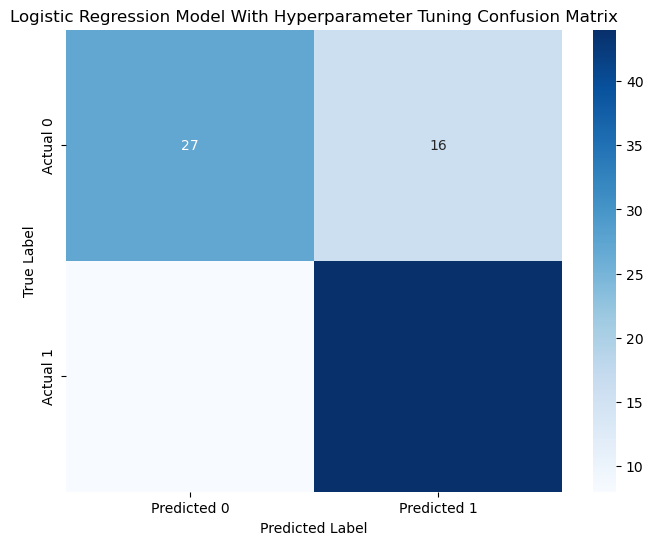

In [416]:
X_Utrain, X_Utest, y_Utrain, y_Utest = train_test_split(X_Uresampled, y_Uresampled, test_size = 0.20, random_state = 23)
logURegModel = LogisticRegression(C = 0.004832930238571752, max_iter = 100, penalty = 'l2', solver = 'liblinear', random_state = 23)

logURegModel.fit(X_Utrain, y_Utrain)
predictionU = logURegModel.predict(X_Utest)

logUReg_accuracy = accuracy_score(y_Utest, predictionU)
logUReg_f1score = f1_score(y_Utest, predictionU)
logUReg_precision = precision_score(y_Utest, predictionU)
logUReg_recall = recall_score(y_Utest, predictionU)
logUReg_confMatrix = confusion_matrix(y_Utest, predictionU)


print("Overall Logistic Regression Model Performance:\n")
print(f'- Accuracy: {logUReg_accuracy * 100:.2f} %')
print(f'- Precision: {logUReg_precision * 100:.2f} %')
print(f'- Recall: {logUReg_recall * 100:.2f} %')
print(f'- F1-score: {logUReg_f1score * 100:.2f} %')
print(f'- Confusion Matrix: \n{logUReg_confMatrix}')


plt.figure(figsize=(8, 6))
sns.heatmap(logUReg_confMatrix, annot = True, fmt = 'd', cmap ='Blues', cbar = True,
            xticklabels = ['Predicted 0', 'Predicted 1'],
            yticklabels = ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Model With Hyperparameter Tuning Confusion Matrix')
plt.show()

To recall, previously, these were the evaluation metrics with no parameter tuning, class imbalance handling, and feature selection: (UPDATE)
*   Accuracy -- 72.79%
*   Precision -- 34.62%
*   Recall -- 75.00%
*   F1-Score -- 47.37%

After undersampling the dataset and some parameter tuning (Solver = newton-cg) -- Model 1:
*   Accuracy: 82.11 %
*   Precision: 87.23 %
*   Recall: 78.85 %
*   F1-score: 82.83 %

After undersampling the dataset and some parameter tuning (Solver = liblinear) -- Model 2:
*   Accuracy: 74.74 %
*   Precision: 73.33 %
*   Recall: 84.62 %
*   F1-score: 78.57 %


Now all scores are very close to each other in both Models 1 and Model 2, which is good. 
Model 1:
- Accuracy went up by 10%, and there's a significant improvement in the F1-score (from 47.37% to 82.83%)
- Significant improvement in the precision scores (from 34.62% to 87.23%), whereas the recall score went up from 75% to 78.85%
- Model 1 is able to correctly identify most employees who left (Recall = 78.85%)
- When Model 1 predicts an employee will leave (attrition = 1), it is correct 87% of the time (Precision) -- most employees the model predicts will leave actually do leave

Model 2:
- Model 1 outperforms Model 2 in terms of accuracy, precision, and F1-Score
- However, Model 2 does a better job at correctly identifying employees who leave the organization, as indicated by its higher recall score of 84.62%

<font color = "gray"><b><u>Conclusion:</u></b>
In HR, it is very important we can identify employees that are at risk of leaving the organization to retain talent and reduce costs. Hence, a high recall score is very important. If the organization prioritizes retaining talent and attrition will be very costly, Model 2 should be their go-to. However, if the organization wants overall balance and false positives (falsely identifying employees as leaving when they're not) would drain HR intervention resources, they should go with Model 1</font>